In [1]:
import os
import re
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import ast
import json
from glob import glob

!apt-get install -y fonts-nanum

In [142]:
import matplotlib as mpl

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [7]:
import matplotlib    
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
 

[]

In [125]:
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm 
path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'

os.path.isfile(path)

True

In [192]:
fontprop = fm.FontProperties(fname=path, size=10) 
font_name = fontprop.get_name()
print(font_name)
plt.rc('font', family=font_name)
#plt.rcParams["font.family"] = fontprop
plt.rcParams['font.family'] = font_name

NanumMyeongjo


Text(0, 0.5, '가격')

/home/mvlab/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/mvlab/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/mvlab/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/mvlab/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/mvlab/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/mvlab/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: 

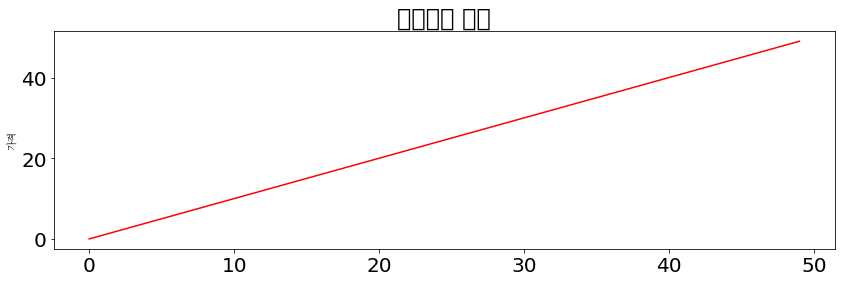

In [193]:
#fontprop = fm.FontProperties(fname=path, size=18) 
#plt.rcParams["font.family"] = path
plt.plot(range(50), 'r') 
plt.title('가격변동 추이')#, fontproperties=fontprop) 
plt.ylabel('가격', fontproperties=fontprop)

In [148]:
#padded_image_shape = (1024, 1920)
min_stride = 128
padded_image_shape = (128*4, 128*8)
anchor_k = 9
num_classes = 80#
max_data_m = 50#00
edgecolors = np.random.rand(num_classes, 3) 
edgecolors = np.minimum(edgecolors+0.1, 1.0)
#class_names = ['bg', 'pig', 'crow']
class_names_kor = ['', '모름', '돼지', '멧돼지', '큰부리까마귀', '흰배지빠귀', '유리딱새', '동고비', 
               '박새', '호랑지빠귀', '검독수리', '너구리', '설치류', '다람쥐', '사람']
class_names = ['bg','unknown', 'pig', 'boar', 'crow', 'bird_hinbajipagi', 'bird_ddaksae', 
               'bird_dongobi', 'bird_baksae', 'bird_horangjipagi', 'bird_eagle', 
               'racoon', 'rat', 'squrrel', 'human']

folder_pig = '/home/mvlab/Downloads/dataset/pig/'

path_weight = "retinanet/pig_efficient_det_BiFPN_D3"
os.path.isdir(folder_pig)

True

In [149]:
def add_folder_to_file_name(folder_pig, path_csv):
    path_csv = folder_pig + path_csv
    path_weight = "retinanet/pig_efficient_det_BiFPN_D3"
    print(os.path.isdir(folder_pig), os.path.isfile(path_csv))
    if os.path.isfile(path_csv):
        df = pd.read_csv(path_csv)
        df['filename'] = folder_pig + df['filename']
        print('df', df.shape, df['filename'].nunique(), df['region_attributes'].nunique()  )
        print(df['region_attributes'].unique())
        return df
    else:
        return None


In [315]:
def read_df(folder_pig, path_csv):
    path_csv = folder_pig + path_csv
    df = pd.read_csv(path_csv)
    print(df.shape)
    return df

In [399]:
df1 = read_df(folder_pig + 'object1/', 'box1.csv')
df2 = read_df(folder_pig + 'object2/', 'box2.csv')
df3 = read_df(folder_pig + 'object3/', 'box3.csv')
df4 = read_df(folder_pig + 'object4/', 'box4.csv')
df5 = read_df(folder_pig + 'object5/', 'box5.csv')

(3451, 7)
(535, 7)
(219, 7)
(6519, 7)
(1777, 7)


In [400]:
df = df4
df = pd.concat((df1, df2, df3, df4, df5), axis=0)
df.shape

(12501, 7)

In [401]:
df['region_attributes'].unique()

array(['{"class":"돼지"}', '{"class":"사람"}', '{"class":"모름"}', '{}',
       '{"class":"멧돼지"}', '{"class":"흰배지빠귀"}', '{"class":"큰부리까마귀"}',
       '{"class":"다람쥐"}', '{"class":"호랑지빠귀"}', '{"class":"설치류"}',
       '{"class":"유리딱새"}', '{"class":undefined}', '{"class":"너구리"}'],
      dtype=object)

In [402]:
df.columns

Index(['filename', 'file_size', 'file_attributes', 'region_count', 'region_id',
       'region_shape_attributes', 'region_attributes'],
      dtype='object')

In [403]:
df = df.drop(columns=['file_size','file_attributes','region_count','region_id','region_shape_attributes'])

In [404]:
df = df.reset_index()
df = df.drop(columns='index')

In [405]:
df

,filename,region_attributes
0,geomex-pig01_2020-09-03_125416_temp-19.70_wat-...,"{""class"":""돼지""}"
1,geomex-pig01_2020-09-03_125416_temp-19.70_wat-...,"{""class"":""사람""}"
2,geomex-pig01_2020-09-03_125706_temp-19.80_wat-...,"{""class"":""사람""}"
3,geomex-pig01_2020-09-03_125706_temp-19.80_wat-...,"{""class"":""사람""}"
4,geomex-pig01_2020-09-03_125956_temp-20.70_wat-...,"{""class"":""사람""}"
...,...,...
12496,geomex-pig05_2020-10-30_130601_temp-14.90_wat-...,"{""class"":""돼지""}"
12497,geomex-pig05_2020-11-01_120825_temp-10.00_wat-...,"{""class"":""큰부리까마귀""}"
12498,geomex-pig05_2020-11-01_120825_temp-10.00_wat-...,"{""class"":""돼지""}"
12499,geomex-pig05_2020-11-01_120825_temp-10.00_wat-...,"{""class"":""돼지""}"


In [406]:
df['site'] = 0
df['date'] = 0
df['temp'] = 0
df['wat'] = None

In [407]:
pre = 'geomex-pig'

for i in range(len(df)):
    filename = df.loc[i, 'filename']
    region_attributes = df.loc[i, 'region_attributes']
    
    if '(' in filename:        
        continue
    
    try:
        context = filename[len(pre) : -4]
        if not '_' in context:            
            continue
            
        contexts = context.split('_')
        if i==0:
            print('context', contexts)
        site = contexts[0]
        date = contexts[1]
        time = contexts[2]
        temp = contexts[3]
        wat = contexts[4]

        temp = temp.split('-')[-1]
        wat = wat.split('-')[-1]
    
        df.loc[i, 'site'] = int(site)
        df.loc[i, 'date'] = date+' '+time
        df.loc[i, 'temp'] = float(temp)
        df.loc[i, 'wat'] = float(wat)
    except:
        print('except', contexts)
        break
        
    region_attributes = ast.literal_eval(region_attributes)
    if len(region_attributes) > 0:
        cls = region_attributes['class']
        if cls in class_names_kor:
            cls_index = class_names_kor.index(cls)
            cls = class_names[cls_index]
            df.loc[i, 'region_attributes'] = cls
            if cls == 'human':
                df.loc[i, 'region_attributes'] = None
    else:
        print('unknown', i, region_attributes)
        df.loc[i, 'region_attributes'] = None           


context ['01', '2020-09-03', '125416', 'temp-19.70', 'wat-85.80']
unknown 40 {}
unknown 41 {}
unknown 75 {}
unknown 123 {}
unknown 153 {}
unknown 168 {}
unknown 303 {}
unknown 553 {}
unknown 554 {}
unknown 689 {}
unknown 928 {}
unknown 1058 {}
unknown 1094 {}
unknown 1165 {}
unknown 1375 {}
unknown 1438 {}
unknown 1513 {}
unknown 1683 {}
unknown 1703 {}
unknown 1855 {}
unknown 1862 {}
unknown 1923 {}
unknown 2294 {}
unknown 2335 {}
unknown 2846 {}
unknown 2847 {}
unknown 2848 {}
unknown 2849 {}
unknown 2850 {}
unknown 2851 {}
unknown 2852 {}
unknown 2853 {}
unknown 2854 {}
unknown 2855 {}
unknown 2856 {}
unknown 2857 {}
unknown 2858 {}
unknown 2859 {}
unknown 2860 {}
unknown 2861 {}
unknown 2862 {}
unknown 2863 {}
unknown 2864 {}
unknown 2865 {}
unknown 2866 {}
unknown 2867 {}
unknown 2868 {}
unknown 2869 {}
unknown 2870 {}
unknown 2871 {}
unknown 2872 {}
unknown 2873 {}
unknown 2874 {}
unknown 2875 {}
unknown 2876 {}
unknown 2877 {}
unknown 2878 {}
unknown 2879 {}
unknown 2880 {}
unkn

unknown 3396 {}
unknown 3397 {}
unknown 3398 {}
unknown 3399 {}
unknown 3400 {}
unknown 3401 {}
unknown 3402 {}
unknown 3403 {}
unknown 3404 {}
unknown 3405 {}
unknown 3406 {}
unknown 3407 {}
unknown 3408 {}
unknown 3409 {}
unknown 3410 {}
unknown 3411 {}
unknown 3412 {}
unknown 3413 {}
unknown 3414 {}
unknown 3415 {}
unknown 3416 {}
unknown 3417 {}
unknown 3418 {}
unknown 3419 {}
unknown 3420 {}
unknown 3421 {}
unknown 3422 {}
unknown 3423 {}
unknown 3424 {}
unknown 3425 {}
unknown 3426 {}
unknown 3427 {}
unknown 3428 {}
unknown 3429 {}
unknown 3430 {}
unknown 3431 {}
unknown 3432 {}
unknown 3433 {}
unknown 3434 {}
unknown 3435 {}
unknown 3436 {}
unknown 3437 {}
unknown 3438 {}
unknown 3439 {}
unknown 3440 {}
unknown 3441 {}
unknown 3442 {}
unknown 3443 {}
unknown 3444 {}
unknown 3445 {}
unknown 3446 {}
unknown 3447 {}
unknown 3448 {}
unknown 3449 {}
unknown 3450 {}
unknown 3616 {}
unknown 3617 {}
unknown 3618 {}
unknown 3619 {}
unknown 3620 {}
unknown 3621 {}
unknown 3622 {}
unknown 

In [408]:
print(df.isna().sum().sum())
df = df.dropna()
print(df.shape)

1628
(10873, 6)


In [409]:
df

,filename,region_attributes,site,date,temp,wat
0,geomex-pig01_2020-09-03_125416_temp-19.70_wat-...,pig,1,2020-09-03 125416,19.7,85.8
5,geomex-pig01_2020-09-03_125956_temp-20.70_wat-...,pig,1,2020-09-03 125956,20.7,81
7,geomex-pig01_2020-09-03_130246_temp-21.20_wat-...,pig,1,2020-09-03 130246,21.2,81.5
9,geomex-pig01_2020-09-03_130536_temp-21.20_wat-...,pig,1,2020-09-03 130536,21.2,75.3
10,geomex-pig01_2020-09-03_130827_temp-21.80_wat-...,pig,1,2020-09-03 130827,21.8,78.6
...,...,...,...,...,...,...
12496,geomex-pig05_2020-10-30_130601_temp-14.90_wat-...,pig,5,2020-10-30 130601,14.9,38
12497,geomex-pig05_2020-11-01_120825_temp-10.00_wat-...,crow,5,2020-11-01 120825,10.0,99.9
12498,geomex-pig05_2020-11-01_120825_temp-10.00_wat-...,pig,5,2020-11-01 120825,10.0,99.9
12499,geomex-pig05_2020-11-01_120825_temp-10.00_wat-...,pig,5,2020-11-01 120825,10.0,99.9


In [410]:
df = df.rename(columns={'region_attributes':'cls'})
df = df.drop(columns='filename')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H%M%S')

In [411]:
df.head()

,cls,site,date,temp,wat
0,pig,1,2020-09-03 12:54:16,19.7,85.8
5,pig,1,2020-09-03 12:59:56,20.7,81
7,pig,1,2020-09-03 13:02:46,21.2,81.5
9,pig,1,2020-09-03 13:05:36,21.2,75.3
10,pig,1,2020-09-03 13:08:27,21.8,78.6


In [412]:
df.head()

,cls,site,date,temp,wat
0,pig,1,2020-09-03 12:54:16,19.7,85.8
5,pig,1,2020-09-03 12:59:56,20.7,81
7,pig,1,2020-09-03 13:02:46,21.2,81.5
9,pig,1,2020-09-03 13:05:36,21.2,75.3
10,pig,1,2020-09-03 13:08:27,21.8,78.6


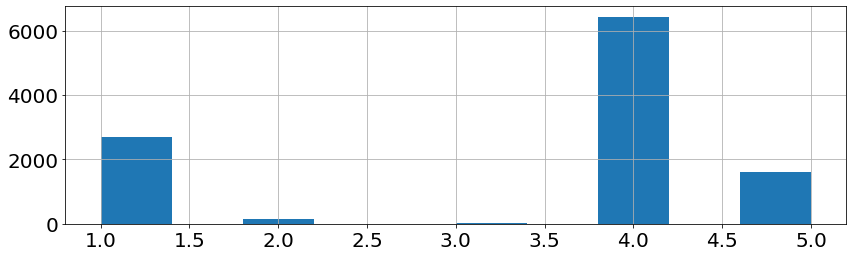

In [413]:
df['site'].hist()

df = df.set_index('date')

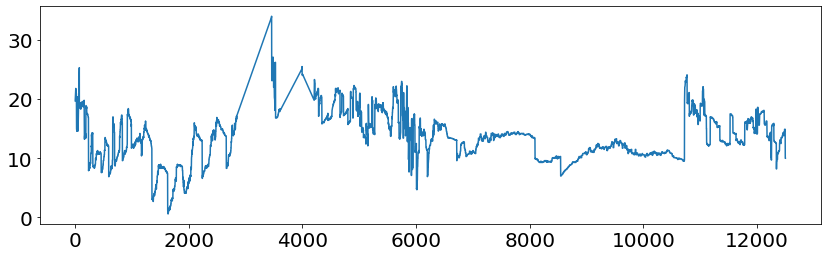

In [414]:
df['temp'].plot()

In [428]:
df_hot = pd.get_dummies(df.drop(columns=['temp','wat']), prefix='', prefix_sep='')
cls_hot = df_hot.groupby('date').sum()#.iloc[:, 1:]

In [429]:
cls_hot

,site,bird_ddaksae,bird_hinbajipagi,bird_horangjipagi,boar,crow,pig,racoon,rat,squrrel,unknown
date,,,,,,,,,,,
2020-08-28 13:35:13,6,0,0,0,0,0,1,0,0,0,2
2020-08-28 13:37:13,2,0,0,0,0,0,1,0,0,0,0
2020-08-30 18:22:10,4,0,0,0,0,1,1,0,0,0,0
2020-08-30 18:25:19,4,0,0,0,0,1,1,0,0,0,0
2020-08-30 18:27:51,4,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-02 16:46:25,20,0,0,0,2,3,0,0,0,0,0
2020-11-02 16:48:26,24,0,0,0,2,4,0,0,0,0,0
2020-11-02 16:50:28,20,0,0,0,2,3,0,0,0,0,0


In [435]:
df_hot.groupby('site').mean()

,bird_ddaksae,bird_hinbajipagi,bird_horangjipagi,boar,crow,pig,racoon,rat,squrrel,unknown
site,,,,,,,,,,
1,0.000372,0.435430,0.000744,0.491254,0.051731,0.005210,0.000000,0.004466,0.000744,0.010048
2,0.000000,0.000000,0.000000,0.000000,0.044444,0.466667,0.000000,0.000000,0.000000,0.488889
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.500000
4,0.066584,0.000156,0.002800,0.289670,0.600809,0.000311,0.019135,0.017424,0.000000,0.003111
5,0.000000,0.000000,0.000000,0.262244,0.090515,0.210167,0.415995,0.000000,0.000000,0.021079


best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

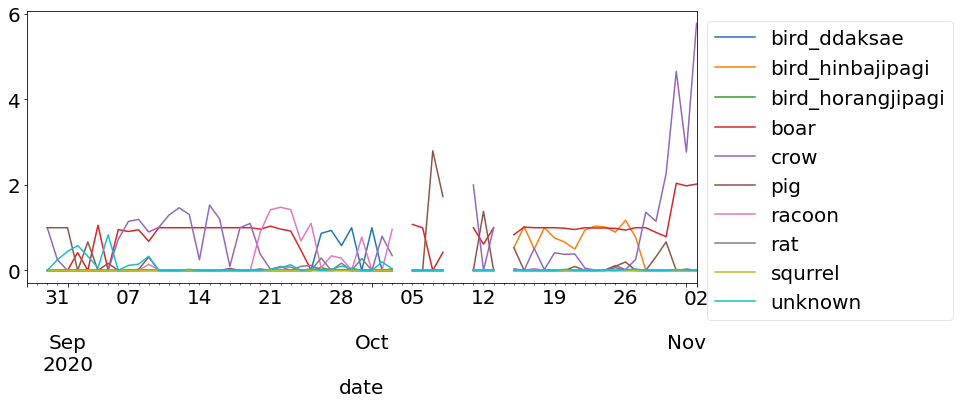

In [427]:
ax = cls_hot.resample('D').mean().plot(figsize=(12,5))
ax.legend(loc='best', fancybox=True, framealpha=0.5, bbox_to_anchor=(1,1))

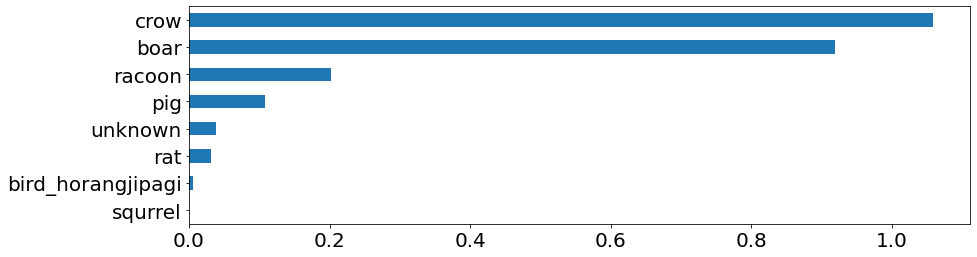

In [418]:
ax = cls_hot.mean().sort_values().plot.barh()

In [398]:
df.resample('D').mean().plot()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

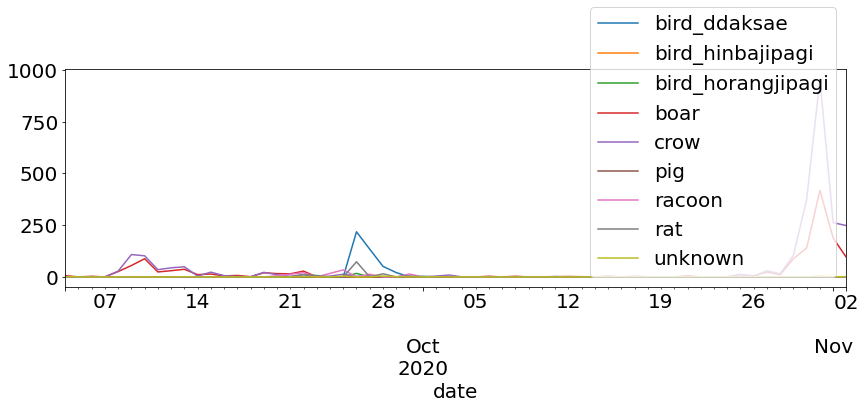

In [196]:
cls_hot.resample('D').sum().plot()

<ipython-input-195-1b7d573c1c17>:1: RuntimeWarning: divide by zero encountered in log
  np.log(cls_hot.resample('D').sum()).plot()


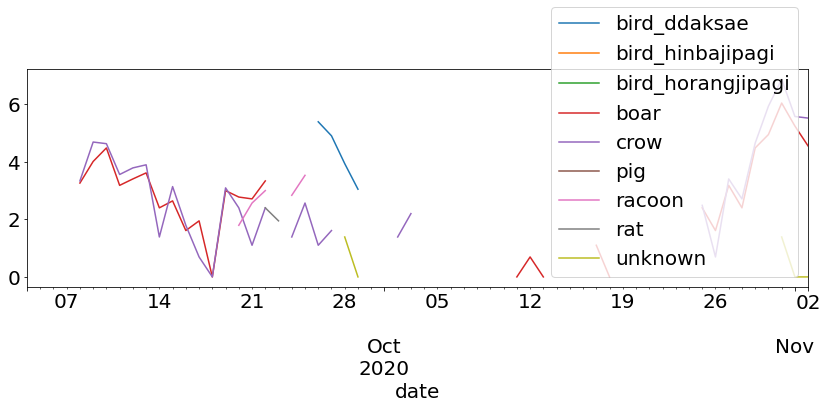

In [195]:
np.log(cls_hot.resample('D').sum()).plot()

In [164]:
df.set_index('date')['2020-10-01':'2020-10-13'].sample(5)

KeyError: "None of ['date'] are in the columns"